In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset

plt.style.use("dark_background")

In [3]:
sales = pd.read_excel(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\supermarkt_sales.xlsx", usecols="B:R", skiprows=3)

sales = sales[['Total', 'Date']]

sales = sales.groupby('Date').sum()

sales.head()

,Total
Date,
2021-01-01,4745.1810
2021-01-02,1945.5030
2021-01-03,2078.1285
2021-01-04,1623.6885
2021-01-05,3536.6835


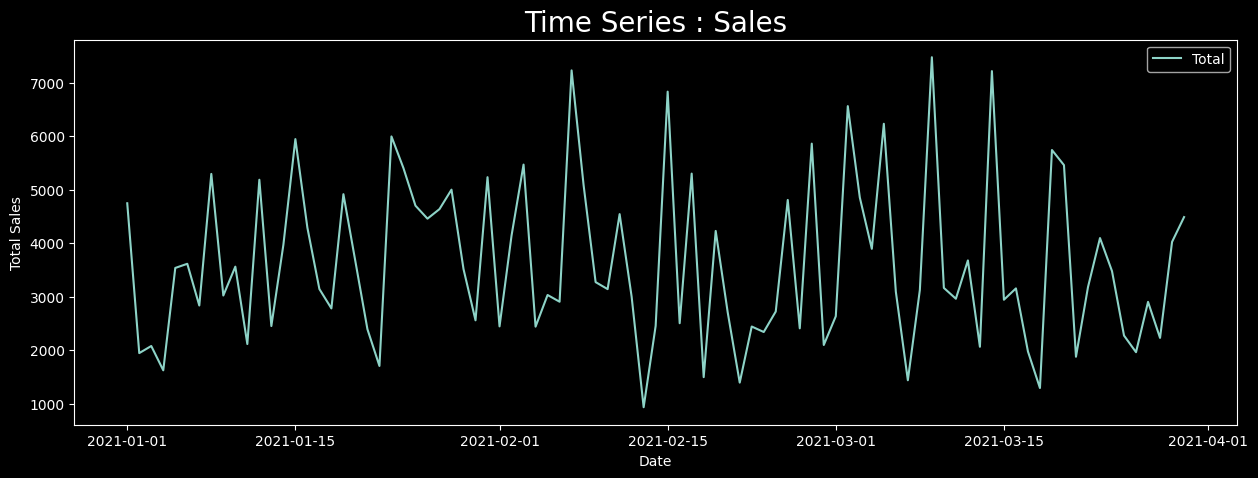

In [4]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales
)

plt.title("Time Series : Sales", fontsize=20)
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()

In [5]:
def Stational(Column:pd.Series)->str:
    ans = adfuller(Column)

    tags = ["ADF_TestStatistic", "p-value", "UsedLag", "NumObs"]

    for i, j in zip(ans, tags):
        print(j, ":", i)
    
    if ans[1] <= 0.05:
        print("The Series is Stational")
    else:
        print("The Series isn't Stational. You should difference the Series ")

In [6]:
Stational(sales['Total'])

ADF_TestStatistic : -7.654895726803343
p-value : 1.7495640309589597e-11
UsedLag : 1
NumObs : 87
The Series is Stational


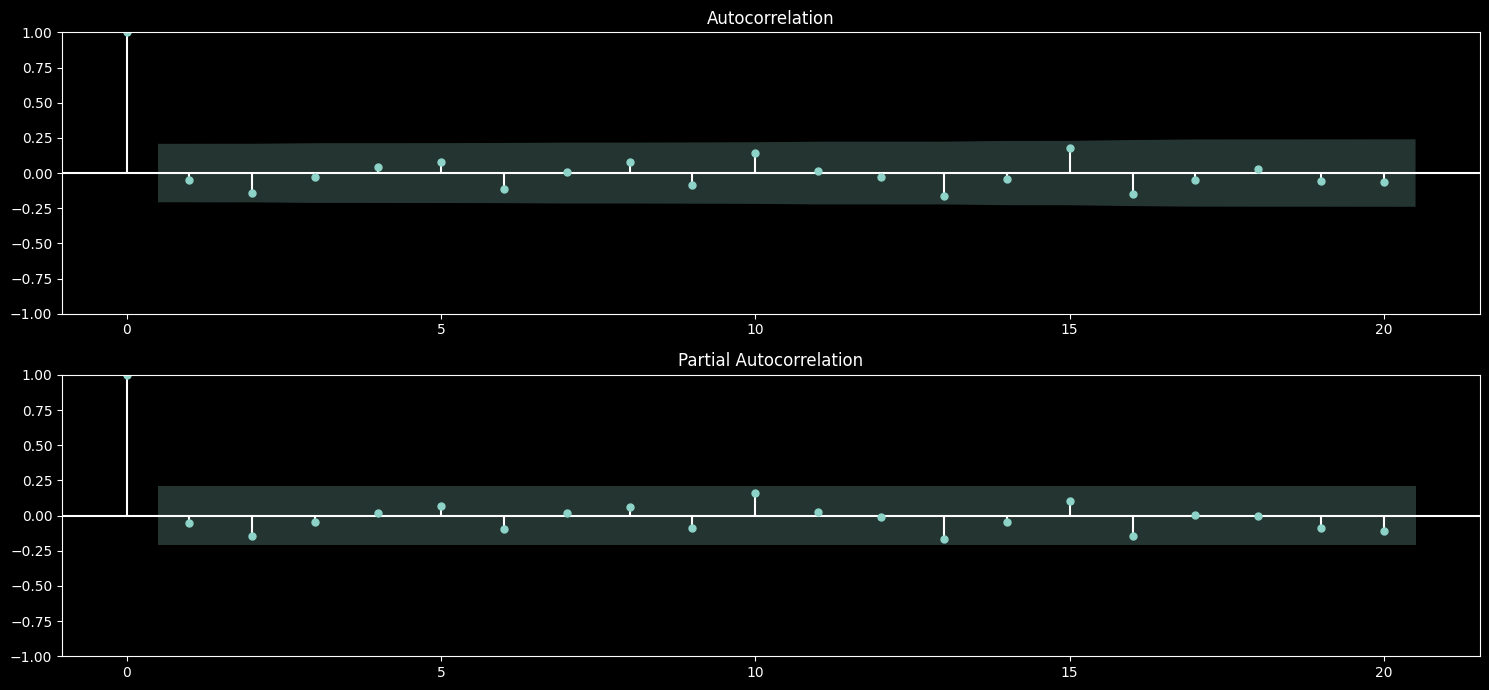

In [7]:
fig , (ax1, ax2) = plt.subplots(2, 1, figsize=(15,7))

tsaplots.plot_acf(sales['Total'], ax=ax1)

tsaplots.plot_pacf(sales['Total'], ax=ax2)

plt.tight_layout()
plt.show()

# **`ARIMA Model`**

c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate s

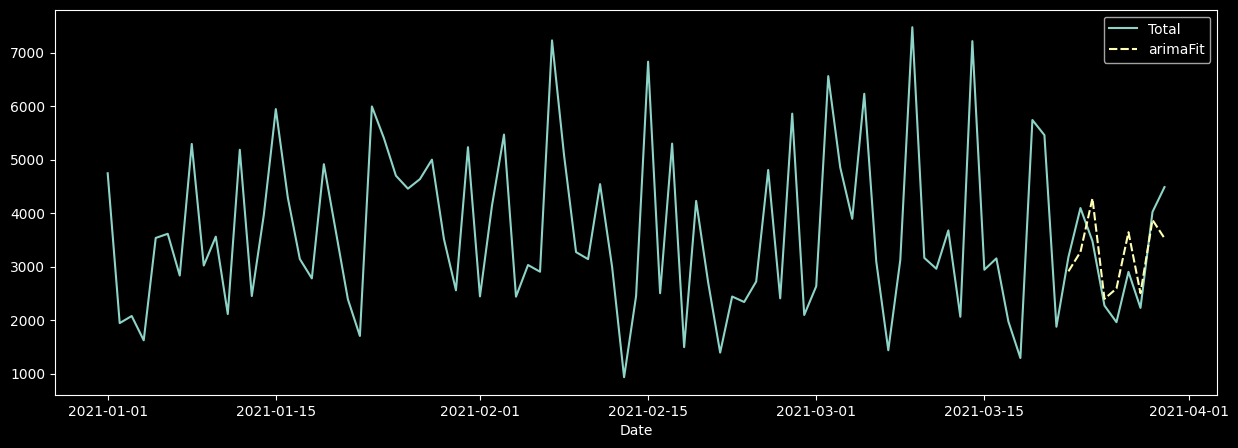

In [8]:
arimaModel = ARIMA(sales['Total'], order=(1,1,100)).fit()

sales['arimaFit'] = arimaModel.predict(start=80, end=sales.shape[0], dynamic=False)

plt.figure(figsize=(15,5))

sns.lineplot(
    sales[['Total', 'arimaFit']]
)

plt.show()

# **`SARIMAX Model`**

c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\env\Lib\site-packages\

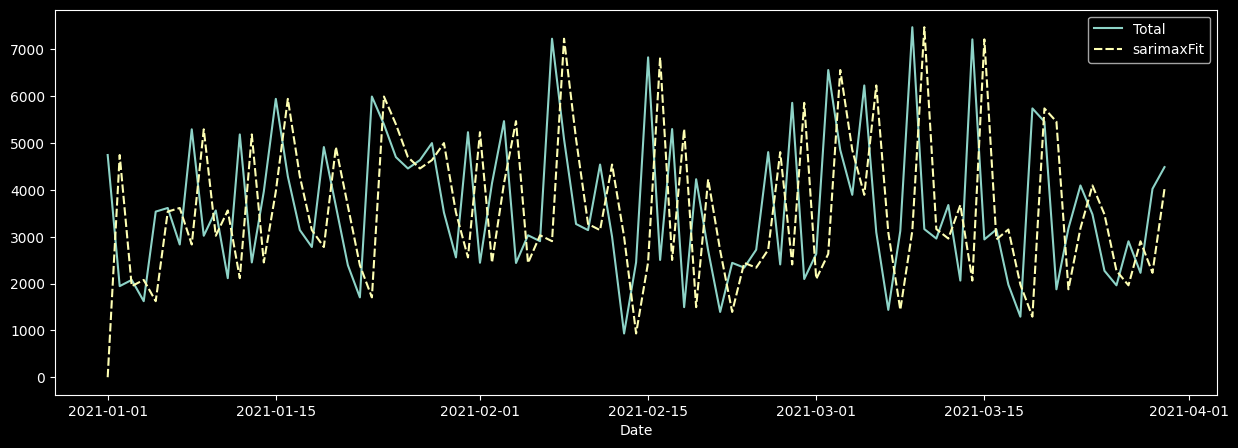

In [9]:
sarimaxModel = SARIMAX(sales['Total'], order=(1,1,1), seasonal_order=(1,1,1,90)).fit()

sales['sarimaxFit'] = sarimaxModel.predict(start=0, end=sales.shape[0], dynamic=False)

plt.figure(figsize=(15,5))

sns.lineplot(
    sales[['Total', 'sarimaxFit']]
)

plt.show()

# **`Forecast`**

C:\Users\roylo\AppData\Local\Temp\ipykernel_72208\1195456193.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast = pd.concat([sales, future], axis=0)


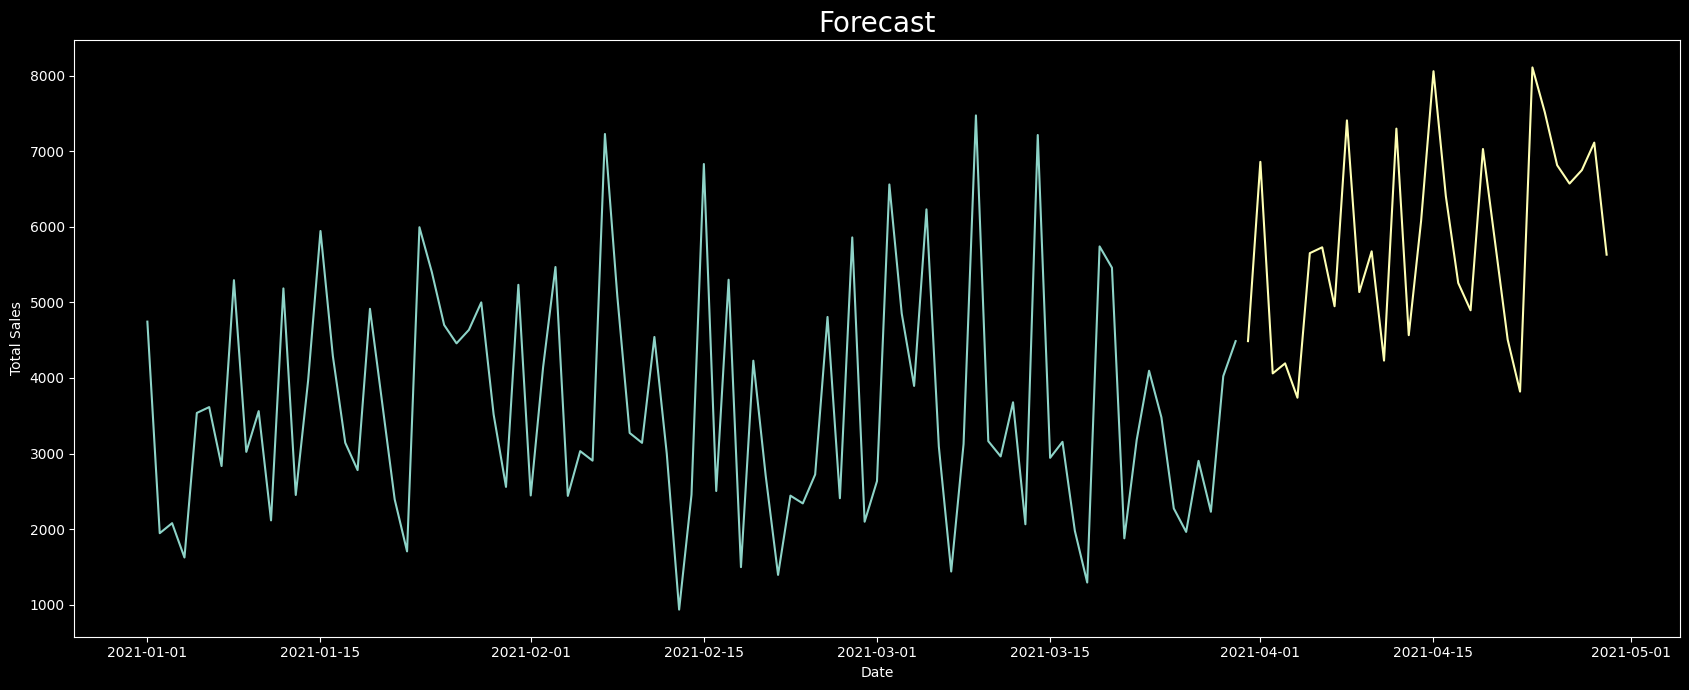

In [12]:
future = pd.DataFrame(index=[sales.index[-1] + DateOffset(days=i) for i in range(0,31)], columns=sales.columns)

forecast = pd.concat([sales, future], axis=0)

forecast['Forecast'] = sarimaxModel.predict(start=sales.shape[0], end=sales.shape[0] + 50)

plt.figure(figsize=(17,7))

sns.lineplot(
    forecast['Total']
)

sns.lineplot(
    data=forecast['Forecast'],
    
)

plt.savefig(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\ETL\Images\forecast.png",dpi=300)
plt.title("Forecast", fontsize=20)
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.tight_layout()
plt.show()